In [ ]:
import pandas as pd

#Load Weather Dataset File
weather = pd.read_csv("Bangalore.csv", index_col = "DATE")

#Displaying the Dataset

In [ ]:
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
2008-07-30,IN009012800,"BANGALORE HINDUSTAN, IN",NaN,70,81.0,68.0
2008-08-01,IN009012800,"BANGALORE HINDUSTAN, IN",NaN,74,83.0,68.0
2008-08-02,IN009012800,"BANGALORE HINDUSTAN, IN",NaN,74,NaN,68.0
2008-08-03,IN009012800,"BANGALORE HINDUSTAN, IN",NaN,71,77.0,68.0
2008-08-04,IN009012800,"BANGALORE HINDUSTAN, IN",NaN,72,76.0,NaN
...,...,...,...,...,...,...
2024-06-28,IN009010100,"BANGALORE, IN",0.00,76,NaN,70.0
2024-06-29,IN009010100,"BANGALORE, IN",0.04,77,85.0,70.0
2024-06-30,IN009010100,"BANGALORE, IN",0.00,75,85.0,71.0


# Calculate the percentage of missing values

In [ ]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

In [ ]:
null_pct

STATION    0.000000
NAME       0.000000
PRCP       0.590468
TAVG       0.000000
TMAX       0.075542
TMIN       0.138582
dtype: float64

# Select columns with less than 4% missing values

In [ ]:
valid_columns = weather.columns[null_pct < .04]
valid_columns

Index(['STATION', 'NAME', 'TAVG'], dtype='object')

# Filter the dataset to include only valid columns

In [ ]:
weather = weather[valid_columns].copy()

# Convert column names to lowercase


In [ ]:
weather.columns = weather.columns.str.lower()
weather

,station,name,tavg
DATE,,,
2008-07-30,IN009012800,"BANGALORE HINDUSTAN, IN",70
2008-08-01,IN009012800,"BANGALORE HINDUSTAN, IN",74
2008-08-02,IN009012800,"BANGALORE HINDUSTAN, IN",74
2008-08-03,IN009012800,"BANGALORE HINDUSTAN, IN",71
2008-08-04,IN009012800,"BANGALORE HINDUSTAN, IN",72
...,...,...,...
2024-06-28,IN009010100,"BANGALORE, IN",76
2024-06-29,IN009010100,"BANGALORE, IN",77
2024-06-30,IN009010100,"BANGALORE, IN",75


# Forward fill to impute missing values

In [ ]:
weather = weather.ffill()

In [ ]:
weather.apply(pd.isnull).sum()

station    0
name       0
tavg       0
dtype: int64

In [ ]:
weather.dtypes

station    object
name       object
tavg        int64
dtype: object

In [ ]:
weather.index

Index(['2008-07-30', '2008-08-01', '2008-08-02', '2008-08-03', '2008-08-04',
       '2008-08-05', '2008-08-06', '2011-01-18', '2011-01-19', '2011-01-20',
       ...
       '2024-06-23', '2024-06-24', '2024-06-25', '2024-06-26', '2024-06-27',
       '2024-06-28', '2024-06-29', '2024-06-30', '2024-07-01', '2024-07-02'],
      dtype='object', name='DATE', length=13198)

In [ ]:
weather.index = pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['2008-07-30', '2008-08-01', '2008-08-02', '2008-08-03',
               '2008-08-04', '2008-08-05', '2008-08-06', '2011-01-18',
               '2011-01-19', '2011-01-20',
               ...
               '2024-06-23', '2024-06-24', '2024-06-25', '2024-06-26',
               '2024-06-27', '2024-06-28', '2024-06-29', '2024-06-30',
               '2024-07-01', '2024-07-02'],
              dtype='datetime64[ns]', name='DATE', length=13198, freq=None)

In [ ]:
weather.index.year.value_counts().sort_index()

DATE
2000    365
2001    365
2002    363
2003    363
2004    366
2005    365
2006    365
2007    362
2008    373
2009    364
2010    365
2011    697
2012    722
2013    399
2014    667
2015    702
2016    725
2017    724
2018    719
2019    725
2020    695
2021    678
2022    709
2023    705
2024    315
Name: count, dtype: int64

In [ ]:
weather

,PRCP,TAVG,TMAX,TMIN,month_avg_TAVG,day_avg_TAVG,target
DATE,,,,,,,
2000-01-01,0.00,67.0,79.0,NaN,67.000000,67.00,67.0
2000-01-02,NaN,67.0,NaN,59.0,67.000000,67.00,69.0
2000-01-03,0.00,69.0,78.0,NaN,67.666667,69.00,69.0
2000-01-04,0.00,69.0,NaN,60.0,68.000000,69.00,70.0
2000-01-05,0.00,70.0,82.0,61.0,68.400000,70.00,71.0
...,...,...,...,...,...,...,...
2024-06-27,0.00,74.0,82.0,71.0,76.145638,75.70,76.0
2024-06-28,0.00,76.0,NaN,70.0,76.145442,75.66,77.0
2024-06-29,0.04,77.0,85.0,70.0,76.146586,75.52,75.0


In [ ]:
weather["target"]=weather.shift (-1)["tavg"]
weather

,station,name,tavg,target
DATE,,,,
2008-07-30,IN009012800,"BANGALORE HINDUSTAN, IN",70,74.0
2008-08-01,IN009012800,"BANGALORE HINDUSTAN, IN",74,74.0
2008-08-02,IN009012800,"BANGALORE HINDUSTAN, IN",74,71.0
2008-08-03,IN009012800,"BANGALORE HINDUSTAN, IN",71,72.0
2008-08-04,IN009012800,"BANGALORE HINDUSTAN, IN",72,74.0
...,...,...,...,...
2024-06-28,IN009010100,"BANGALORE, IN",76,77.0
2024-06-29,IN009010100,"BANGALORE, IN",77,75.0
2024-06-30,IN009010100,"BANGALORE, IN",75,74.0


In [ ]:
weather = weather.ffill()
weather

,station,name,tavg,target
DATE,,,,
2008-07-30,IN009012800,"BANGALORE HINDUSTAN, IN",70,74.0
2008-08-01,IN009012800,"BANGALORE HINDUSTAN, IN",74,74.0
2008-08-02,IN009012800,"BANGALORE HINDUSTAN, IN",74,71.0
2008-08-03,IN009012800,"BANGALORE HINDUSTAN, IN",71,72.0
2008-08-04,IN009012800,"BANGALORE HINDUSTAN, IN",72,74.0
...,...,...,...,...
2024-06-28,IN009010100,"BANGALORE, IN",76,77.0
2024-06-29,IN009010100,"BANGALORE, IN",77,75.0
2024-06-30,IN009010100,"BANGALORE, IN",75,74.0


# Initialize Ridge Regression with alpha = 0.1

In [ ]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

# Select predictors excluding target, name, and station columns

In [ ]:
predictors = weather.columns[~weather.columns.isin(["target","name","station"])]
predictors

Index(['tavg'], dtype='object')

In [ ]:
def backtest(weather,model,predictors,start=3650,step=90):
  all_predictors=[]
  for i in range(start,weather.shape[0],step):
    train = weather.iloc[:i,:]
    test = weather.iloc[i:(i+step),:]

     # Fit the model on training data
    model.fit(train[predictors], train["target"])

    # Make predictions on the test data
    preds = model.predict(test[predictors])

    # Create a DataFrame to compare actual and predicted values
    preds = pd.Series(preds, index=test.index)
    combined = pd.concat([test["target"],preds], axis=1)

    combined.columns = ["actual","prediction"]

    # Calculate the absolute difference between actual and predicted values
    combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
    all_predictors.append(combined)
  return pd.concat(all_predictors, axis=0)



# Perform backtesting

In [ ]:
predictions = backtest(weather, rr, predictors)

In [ ]:
predictions

,actual,prediction,diff
DATE,,,
2022-08-03,71.0,73.205188,2.205188
2022-08-04,71.0,71.345401,0.345401
2022-08-05,71.0,71.345401,0.345401
2022-08-06,73.0,71.345401,1.654599
2022-08-07,72.0,73.205188,1.205188
...,...,...,...
2024-06-28,77.0,75.950233,1.049767
2024-06-29,75.0,76.871639,1.871639
2024-06-30,74.0,75.028826,1.028826


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["actual"],predictions["prediction"])

1.2597114182404707

In [ ]:
predictions["diff"].mean()

1.2597114182404707

#Rolling Averages Function

In [ ]:
def pct_diff(old, new):
  return (new-old)/old

def compute_rolling(weather, horizon, col):
  label = f"rolling_{horizon}_{col}"

  # Calculate rolling mean and percentage difference
  weather[label] = weather[col].rolling(horizon).mean()
  weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
  return weather

# Define rolling horizons
rolling_horizons = [3,14]

# Apply rolling averages for the 'tavg' column
for horizon in rolling_horizons:
  for col in ["tavg"]:
    weather = compute_rolling(weather, horizon, col)

In [ ]:
weather

,station,name,tavg,target,rolling_3_tavg,rolling_3_tavg_pct,rolling_14_tavg,rolling_14_tavg_pct
DATE,,,,,,,,
2008-07-30,IN009012800,"BANGALORE HINDUSTAN, IN",70,74.0,NaN,NaN,NaN,NaN
2008-08-01,IN009012800,"BANGALORE HINDUSTAN, IN",74,74.0,NaN,NaN,NaN,NaN
2008-08-02,IN009012800,"BANGALORE HINDUSTAN, IN",74,71.0,72.666667,0.018349,NaN,NaN
2008-08-03,IN009012800,"BANGALORE HINDUSTAN, IN",71,72.0,73.000000,-0.027397,NaN,NaN
2008-08-04,IN009012800,"BANGALORE HINDUSTAN, IN",72,74.0,72.333333,-0.004608,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-06-28,IN009010100,"BANGALORE, IN",76,77.0,75.000000,0.013333,76.428571,-0.005607
2024-06-29,IN009010100,"BANGALORE, IN",77,75.0,75.666667,0.017621,76.357143,0.008419
2024-06-30,IN009010100,"BANGALORE, IN",75,74.0,76.000000,-0.013158,76.142857,-0.015009


# Remove rows with NaN values introduced by rolling averages

In [ ]:
weather = weather.iloc[14:,:]

In [ ]:
weather

,station,name,tavg,target,rolling_3_tavg,rolling_3_tavg_pct,rolling_14_tavg,rolling_14_tavg_pct
DATE,,,,,,,,
2011-01-26,IN009012800,"BANGALORE HINDUSTAN, IN",62,65.0,64.333333,-0.036269,69.642857,-0.109744
2011-01-27,IN009012800,"BANGALORE HINDUSTAN, IN",65,69.0,64.000000,0.015625,69.000000,-0.057971
2011-01-28,IN009012800,"BANGALORE HINDUSTAN, IN",69,73.0,65.333333,0.056122,68.642857,0.005203
2011-01-29,IN009012800,"BANGALORE HINDUSTAN, IN",73,69.0,69.000000,0.057971,68.785714,0.061267
2011-01-30,IN009012800,"BANGALORE HINDUSTAN, IN",69,69.0,70.333333,-0.018957,68.571429,0.006250
...,...,...,...,...,...,...,...,...
2024-06-28,IN009010100,"BANGALORE, IN",76,77.0,75.000000,0.013333,76.428571,-0.005607
2024-06-29,IN009010100,"BANGALORE, IN",77,75.0,75.666667,0.017621,76.357143,0.008419
2024-06-30,IN009010100,"BANGALORE, IN",75,74.0,76.000000,-0.013158,76.142857,-0.015009


# Fill remaining NaN values with 0


In [ ]:
weather = weather.fillna(0)

#Expanding Means Function

In [ ]:
import pandas as pd

# Load Weather Dataset File
weather = pd.read_csv("Bangalore.csv", index_col="DATE")

# Print the column names
print(weather.columns)


Index(['STATION', 'NAME', 'PRCP', 'TAVG', 'TMAX', 'TMIN'], dtype='object')


In [ ]:
import pandas as pd

# Load Weather Dataset File
weather = pd.read_csv("Bangalore.csv", index_col="DATE")

# Ensure the 'DATE' column is of datetime type
weather.index = pd.to_datetime(weather.index)

# Identify non-numeric values in the 'TAVG' column
non_numeric = weather[~weather["TAVG"].apply(lambda x: pd.to_numeric(x, errors='coerce')).notna()]
print("Non-numeric values found in 'TAVG' column:")
print(non_numeric)

# Remove non-numeric values
weather = weather[pd.to_numeric(weather["TAVG"], errors='coerce').notna()]
weather["TAVG"] = weather["TAVG"].astype(float)

# Check for duplicate index labels
duplicates = weather.index.duplicated()
if duplicates.any():
    print("Duplicate index labels found:")
    print(weather.index[duplicates])
    # Aggregate duplicates by taking the mean of only numeric columns
    weather = weather.groupby(weather.index).mean(numeric_only=True)
else:
    print("No duplicate index labels found.")

# Define the function for expanding means
def expand_mean(df):
    return df.expanding(1).mean()

# Apply expanding means for the 'TAVG' column
for col in ["TAVG"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

# Display the updated DataFrame
print(weather.head())


Non-numeric values found in 'TAVG' column:
Empty DataFrame
Columns: [STATION, NAME, PRCP, TAVG, TMAX, TMIN]
Index: []
Duplicate index labels found:
DatetimeIndex(['2008-07-30', '2008-08-01', '2008-08-02', '2008-08-03',
               '2008-08-04', '2008-08-05', '2008-08-06', '2011-01-18',
               '2011-01-19', '2011-01-20',
               ...
               '2024-05-21', '2024-05-22', '2024-05-23', '2024-05-24',
               '2024-05-25', '2024-05-26', '2024-05-27', '2024-05-28',
               '2024-05-29', '2024-05-30'],
              dtype='datetime64[ns]', name='DATE', length=4273, freq=None)
            PRCP  TAVG  TMAX  TMIN  month_avg_TAVG  day_avg_TAVG
DATE                                                            
2000-01-01   0.0  67.0  79.0   NaN       67.000000          67.0
2000-01-02   NaN  67.0   NaN  59.0       67.000000          67.0
2000-01-03   0.0  69.0  78.0   NaN       67.666667          69.0
2000-01-04   0.0  69.0   NaN  60.0       68.000000          69

In [ ]:
weather

,PRCP,TAVG,TMAX,TMIN,month_avg_TAVG,day_avg_TAVG
DATE,,,,,,
2000-01-01,0.00,67.0,79.0,NaN,67.000000,67.00
2000-01-02,NaN,67.0,NaN,59.0,67.000000,67.00
2000-01-03,0.00,69.0,78.0,NaN,67.666667,69.00
2000-01-04,0.00,69.0,NaN,60.0,68.000000,69.00
2000-01-05,0.00,70.0,82.0,61.0,68.400000,70.00
...,...,...,...,...,...,...
2024-06-28,0.00,76.0,NaN,70.0,76.145442,75.66
2024-06-29,0.04,77.0,85.0,70.0,76.146586,75.52
2024-06-30,0.00,75.0,85.0,71.0,76.145053,75.32


In [ ]:
predictors = weather.columns[~weather.columns.isin(["target","name","station"])]
predictors

Index(['PRCP', 'TAVG', 'TMAX', 'TMIN', 'month_avg_TAVG', 'day_avg_TAVG'], dtype='object')

# Perform backtesting on the modified dataset

In [ ]:
import pandas as pd

# Load Weather Dataset File
weather = pd.read_csv("Bangalore.csv", index_col="DATE")

# Ensure the 'DATE' column is of datetime type
weather.index = pd.to_datetime(weather.index)

# Identify non-numeric values in the 'TAVG' column
non_numeric = weather[~weather["TAVG"].apply(lambda x: pd.to_numeric(x, errors='coerce')).notna()]
print("Non-numeric values found in 'TAVG' column:")
print(non_numeric)

# Remove non-numeric values
weather = weather[pd.to_numeric(weather["TAVG"], errors='coerce').notna()]
weather["TAVG"] = weather["TAVG"].astype(float)

# Check for duplicate index labels
duplicates = weather.index.duplicated()
if duplicates.any():
    print("Duplicate index labels found:")
    print(weather.index[duplicates])
    # Aggregate duplicates by taking the mean of only numeric columns
    weather = weather.groupby(weather.index).mean(numeric_only=True)
else:
    print("No duplicate index labels found.")

# Define the function for expanding means
def expand_mean(df):
    return df.expanding(1).mean()

# Apply expanding means for the 'TAVG' column
for col in ["TAVG"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

# Define the target column (example: predicting the next day's average temperature)
weather["target"] = weather["TAVG"].shift(-1)

# Drop the last row as it will have a NaN target
weather = weather.dropna(subset=["target"])

# Define the predictors (example: using TAVG and its expanding means)
predictors = ["TAVG", "month_avg_TAVG", "day_avg_TAVG"]

# Example backtest function (you need to define the backtest function)
def backtest(weather, rr, predictors):
    # Your backtest logic here
    pass

# Assuming rr is defined somewhere in your code
rr = None  # Placeholder for the rr variable

# Run the backtest
predictions = backtest(weather, rr, predictors)

# Display the predictions
print(predictions)


Non-numeric values found in 'TAVG' column:
Empty DataFrame
Columns: [STATION, NAME, PRCP, TAVG, TMAX, TMIN]
Index: []
Duplicate index labels found:
DatetimeIndex(['2008-07-30', '2008-08-01', '2008-08-02', '2008-08-03',
               '2008-08-04', '2008-08-05', '2008-08-06', '2011-01-18',
               '2011-01-19', '2011-01-20',
               ...
               '2024-05-21', '2024-05-22', '2024-05-23', '2024-05-24',
               '2024-05-25', '2024-05-26', '2024-05-27', '2024-05-28',
               '2024-05-29', '2024-05-30'],
              dtype='datetime64[ns]', name='DATE', length=4273, freq=None)
None


In [ ]:
predictions = backtest(weather, rr, predictors)

# Evaluate Mean Absolute Error

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Example backtest function
def backtest(data, rr, predictors):
    train_size = int(0.8 * len(data))
    train = data.iloc[:train_size]
    test = data.iloc[train_size:]

    model = LinearRegression()
    model.fit(train[predictors], train["target"])

    predictions = model.predict(test[predictors])

    test = test.copy()
    test["prediction"] = predictions
    return test

# Assuming rr is defined somewhere in your code
rr = None  # Placeholder for the rr variable

# Define the predictors
predictors = ["TAVG", "month_avg_TAVG", "day_avg_TAVG"]

# Run the backtest
predictions = backtest(weather, rr, predictors)

# Calculate mean absolute error
mae = mean_absolute_error(predictions["target"], predictions["prediction"])
print("Mean Absolute Error:", mae)


Mean Absolute Error: 1.1224308124163223


# Analyze top differences in predictions

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Example backtest function
def backtest(data, rr, predictors):
    train_size = int(0.8 * len(data))
    train = data.iloc[:train_size]
    test = data.iloc[train_size:]

    model = LinearRegression()
    model.fit(train[predictors], train["target"])

    predictions = model.predict(test[predictors])

    test = test.copy()
    test["prediction"] = predictions
    test["actual"] = test["target"]
    return test

# Assuming rr is defined somewhere in your code
rr = None  # Placeholder for the rr variable

# Define the predictors
predictors = ["TAVG", "month_avg_TAVG", "day_avg_TAVG"]

# Run the backtest
predictions = backtest(weather, rr, predictors)

# Calculate mean absolute error
mae = mean_absolute_error(predictions["actual"], predictions["prediction"])
print("Mean Absolute Error:", mae)

# Calculate the difference between actual and predicted values
predictions["diff"] = (predictions["actual"] - predictions["prediction"]).abs()

# Sort the DataFrame by the 'diff' column in descending order
predictions_sorted = predictions.sort_values("diff", ascending=False)

# Display the sorted DataFrame
print(predictions_sorted[["actual", "prediction", "diff"]].head())

# Display the full sorted DataFrame
predictions_sorted_output = predictions_sorted[["actual", "prediction", "diff"]]
print(predictions_sorted_output)



Mean Absolute Error: 1.1224308124163223
            actual  prediction      diff
DATE                                    
2022-05-18    69.5   76.229945  6.729945
2020-04-28    74.5   81.226746  6.726746
2022-04-30    76.5   82.311642  5.811642
2024-05-31    78.0   83.716239  5.716239
2020-04-23    78.0   83.511025  5.511025
            actual  prediction      diff
DATE                                    
2022-05-18    69.5   76.229945  6.729945
2020-04-28    74.5   81.226746  6.726746
2022-04-30    76.5   82.311642  5.811642
2024-05-31    78.0   83.716239  5.716239
2020-04-23    78.0   83.511025  5.511025
...            ...         ...       ...
2021-12-25    70.5   70.504086  0.004086
2022-03-11    78.0   77.996678  0.003322
2022-05-20    73.5   73.502829  0.002829
2023-09-07    75.0   75.002267  0.002267
2023-07-02    75.0   75.001498  0.001498

[1785 rows x 3 columns]


# Display a specific date range and the corresponding differences

In [ ]:
weather.loc["2023-11-01":"2024-05-15"]

,PRCP,TAVG,TMAX,TMIN,month_avg_TAVG,day_avg_TAVG,target
DATE,,,,,,,
2023-11-01,0.000,75.5,84.5,66.5,72.055716,73.104167,75.5
2023-11-02,NaN,75.5,84.5,67.0,72.060694,72.833333,75.5
2023-11-03,0.000,75.5,87.0,68.5,72.065657,72.895833,73.5
2023-11-04,0.105,73.5,87.5,67.5,72.067723,73.125000,75.0
2023-11-05,0.725,75.0,83.5,67.5,72.071942,73.500000,75.0
...,...,...,...,...,...,...,...
2024-05-11,0.030,80.5,90.5,70.0,79.765604,80.420000,79.5
2024-05-12,0.000,79.5,93.0,NaN,79.765252,80.120000,78.0
2024-05-13,0.730,78.0,92.5,69.0,79.762914,80.720000,77.5


# Visualize the distribution of prediction differences

<Axes: xlabel='diff'>

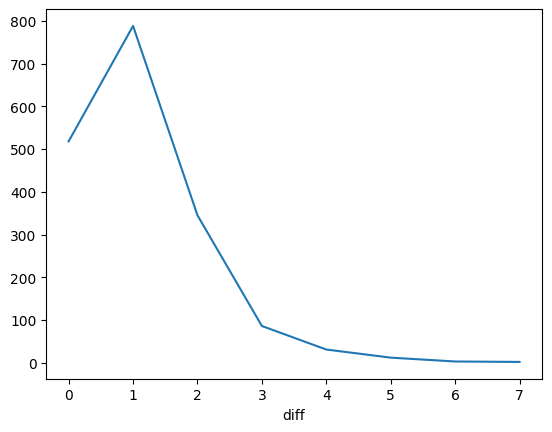

In [ ]:
predictions["diff"].round().value_counts().sort_index().plot()

#Predicted Result for Weather using the given dataset

In [ ]:
predictions

,PRCP,TAVG,TMAX,TMIN,month_avg_TAVG,day_avg_TAVG,target,prediction,actual,diff
DATE,,,,,,,,,,
2019-07-28,0.01,74.0,84.5,69.0,74.470016,74.075,74.5,74.187354,74.5,0.312646
2019-07-29,0.14,74.5,83.0,69.0,74.470065,74.125,73.5,74.569817,73.5,1.069817
2019-07-30,0.00,73.5,82.5,68.0,74.468498,73.850,76.5,73.794265,76.5,2.705735
2019-07-31,NaN,76.5,87.0,67.5,74.471774,73.925,76.5,76.076252,76.5,0.423748
2019-08-01,NaN,76.5,87.0,69.0,74.196429,74.100,74.5,76.037197,74.5,1.537197
...,...,...,...,...,...,...,...,...,...,...
2024-06-27,0.00,74.0,82.0,71.0,76.145638,75.700,76.0,74.584322,76.0,1.415678
2024-06-28,0.00,76.0,NaN,70.0,76.145442,75.660,77.0,76.099890,77.0,0.900110
2024-06-29,0.04,77.0,85.0,70.0,76.146586,75.520,75.0,76.850791,75.0,1.850791


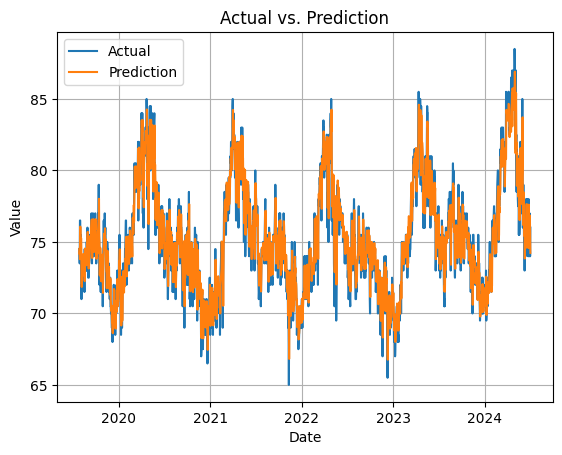

In [ ]:
# @title actual vs prediction

import matplotlib.pyplot as plt

# Assuming 'predictions' is a DataFrame with 'actual' and 'prediction' columns
plt.plot(predictions.index, predictions['actual'], label='Actual')
plt.plot(predictions.index, predictions['prediction'], label='Prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Prediction')
plt.legend()
plt.grid(True)
plt.show()